In [2]:
data_rnn = {
    "name": "RNN",
    "accuracy": 0.876,
    "f1_0": 0.722,
    "f1_1": 0.920,
    "precision_0": 0.705,
    "precision_1": 0.926,
    "recall_0": 0.739,
    "recall_1": 0.914,
}
data_rnn_balanced = {
    "name": "RNN (balanced)",
    "accuracy": 0.849,
    "f1_0": 0.818,
    "f1_1": 0.870,
    "precision_0": 0.781,
    "precision_1": 0.901,
    "recall_0": 0.858,
    "recall_1": 0.842,
}
data_cnn = {
    "name": "CNN",
    "accuracy": 0.837,
    "f1_0": 0.706,
    "f1_1": 0.887,
    "precision_0": 0.664,
    "precision_1": 0.909,
    "recall_0": 0.753,
    "recall_1": 0.866,
}
data_cnn_embeddings = {
    "name": "CNN (embeddings)",
    "accuracy": 0.840,
    "f1_0": 0.690,
    "f1_1": 0.892,
    "precision_0": 0.695,
    "precision_1": 0.890,
    "recall_0": 0.684,
    "recall_1": 0.895,
}
#incomplete
data_BERT_10k = {
    "name": "BERT_10k",
    "accuracy": 0.915,
    "f1_0": 0.796,
    "f1_1": 0.944,
    "precision_0": 0.776,
    "precision_1": 0.956,
    "recall_0": 0.842,
    "recall_1": 0.934,
}
data_BERT_5k = {
    "name": "BERT_5k",
    "accuracy": 0.916,
    "f1_0": 0.777,
    "f1_1": 0.946,
    "precision_0": 0.860,
    "precision_1": 0.929,
    "recall_0": 0.733,
    "recall_1": 0.967,    
}

list_of_dicts = [data_rnn, data_rnn_balanced, data_cnn, data_cnn_embeddings, data_BERT_10k, data_BERT_5k]

In [3]:
accuracy = {}
f1_0 = {}
f1_1 = {}
precision_0 = {}
precision_1 = {}
recall_0 = {}
recall_1 = {}
metrics = {"Accuracy": accuracy, "F1_0": f1_0, "F1_1": f1_1, "Precision_0": precision_0, "Precision_1": precision_1, "Recall_0":recall_0, "Recall_1": recall_1}


list_of_metrics = [accuracy, f1_0, f1_1, precision_0, precision_1, recall_0, recall_1]

#put every metric in a dictionary
for model in list_of_dicts:
    accuracy[model["name"]] = model["accuracy"]
    f1_0[model["name"]] = model["f1_0"]
    f1_1[model["name"]] = model["f1_1"]
    precision_0[model["name"]] = model["precision_0"]
    precision_1[model["name"]] = model["precision_1"]
    recall_0[model["name"]] = model["recall_0"]
    recall_1[model["name"]] = model["recall_1"]
    


In [4]:
print(list_of_metrics[0])
print(metrics)

{'RNN': 0.876, 'RNN (balanced)': 0.849, 'CNN': 0.837, 'CNN (embeddings)': 0.84, 'BERT_10k': 0.915, 'BERT_5k': 0.916}
{'Accuracy': {'RNN': 0.876, 'RNN (balanced)': 0.849, 'CNN': 0.837, 'CNN (embeddings)': 0.84, 'BERT_10k': 0.915, 'BERT_5k': 0.916}, 'F1_0': {'RNN': 0.722, 'RNN (balanced)': 0.818, 'CNN': 0.706, 'CNN (embeddings)': 0.69, 'BERT_10k': 0.796, 'BERT_5k': 0.777}, 'F1_1': {'RNN': 0.92, 'RNN (balanced)': 0.87, 'CNN': 0.887, 'CNN (embeddings)': 0.892, 'BERT_10k': 0.944, 'BERT_5k': 0.946}, 'Precision_0': {'RNN': 0.705, 'RNN (balanced)': 0.781, 'CNN': 0.664, 'CNN (embeddings)': 0.695, 'BERT_10k': 0.776, 'BERT_5k': 0.86}, 'Precision_1': {'RNN': 0.926, 'RNN (balanced)': 0.901, 'CNN': 0.909, 'CNN (embeddings)': 0.89, 'BERT_10k': 0.956, 'BERT_5k': 0.929}, 'Recall_0': {'RNN': 0.739, 'RNN (balanced)': 0.858, 'CNN': 0.753, 'CNN (embeddings)': 0.684, 'BERT_10k': 0.842, 'BERT_5k': 0.733}, 'Recall_1': {'RNN': 0.914, 'RNN (balanced)': 0.842, 'CNN': 0.866, 'CNN (embeddings)': 0.895, 'BERT_10k':

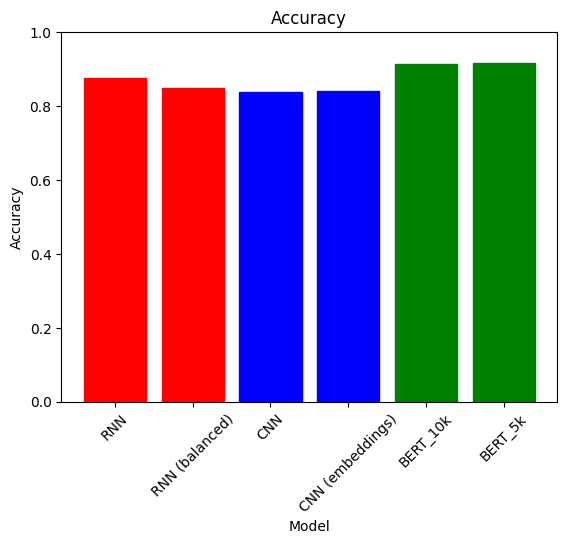

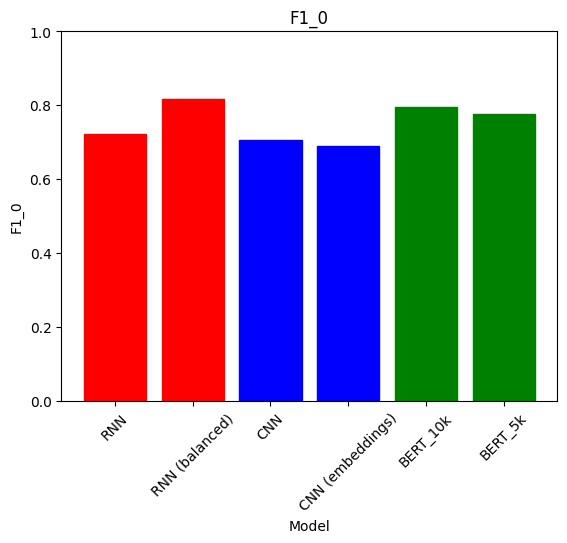

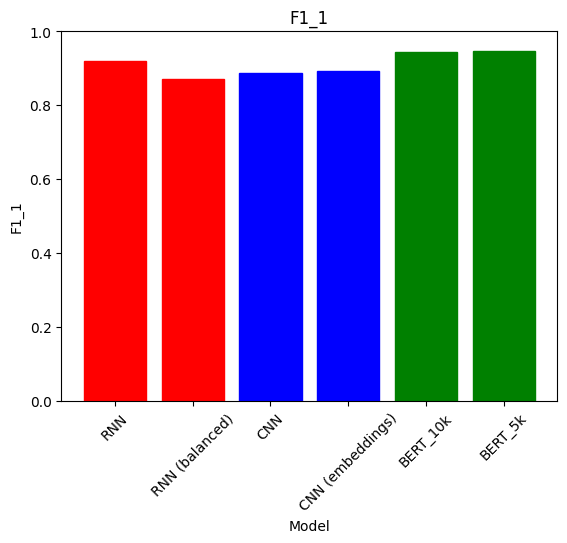

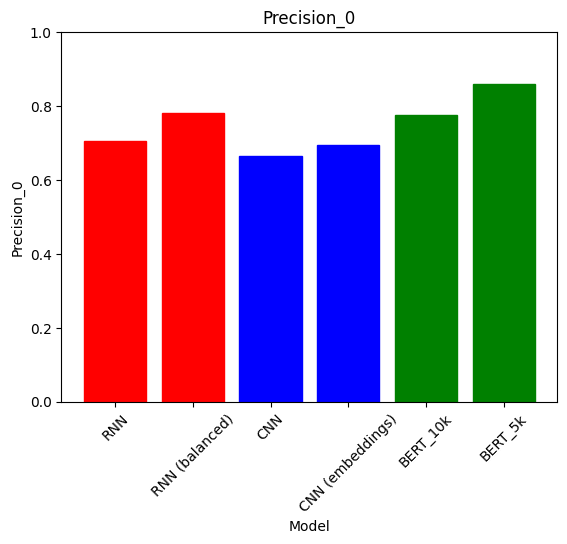

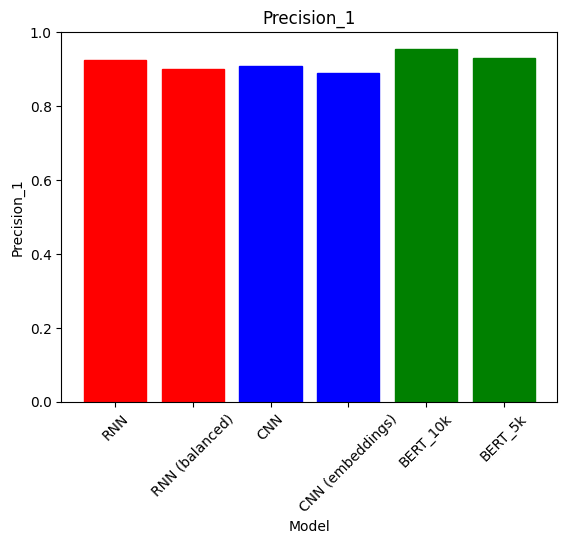

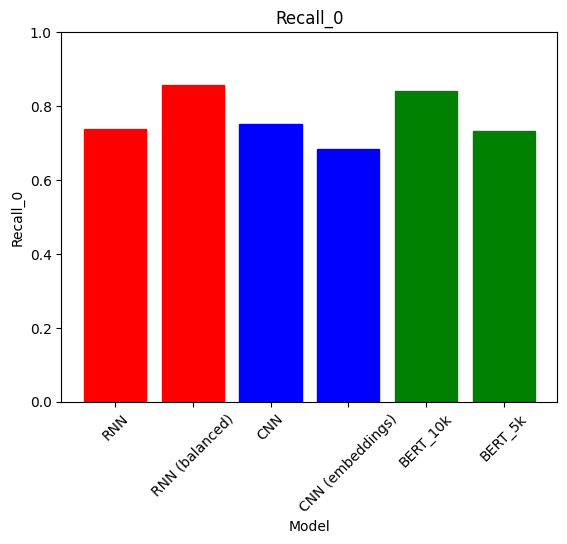

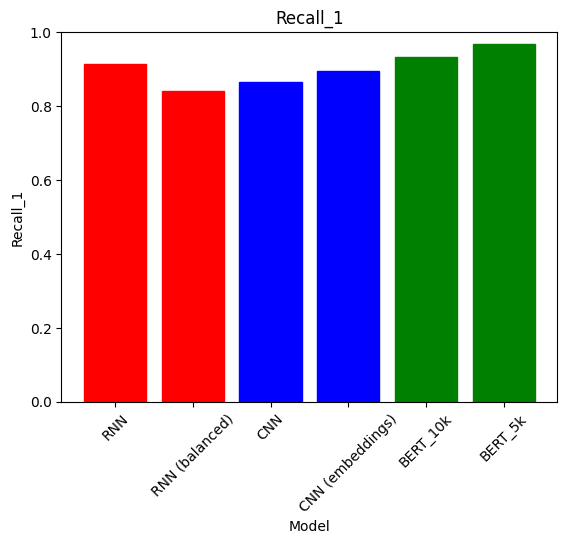

In [15]:
import matplotlib.pyplot as plt

# plot accuracy from accuracy dict (bar chart)
def plot_metric_per_model(metric_dict, metric_name):
    plt.bar(metric_dict.keys(), metric_dict.values(), color='g')
    # make the labels readable
    plt.xticks(rotation=45)
    # change the y axis to be from 0 to 1
    plt.ylim(0, 1)
    # change colors of the bars
    plt.gca().get_children()[0].set_color('r')
    plt.gca().get_children()[1].set_color('r')
    plt.gca().get_children()[2].set_color('b')
    plt.gca().get_children()[3].set_color('b')
    plt.gca().get_children()[4].set_color('g')
    plt.gca().get_children()[5].set_color('g')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.title(metric_name)
    plt.show()

for metric_name in metrics.keys():
    plot_metric_per_model(metrics[metric_name], metric_name)


In [14]:
# export the list of metrics to a csv file
# set row names as metrics
import pandas as pd


df = pd.DataFrame(list_of_dicts)


# sort by the average f1 score
# the average f1 score is the f1_1 + f1_2  / 2
df['avg_f1'] = round((df['f1_1'] + df['f1_0']) / 2, 3)

df = df.sort_values(by=['avg_f1'], ascending=False)
df.to_csv("metrics_sorted.csv")